In [18]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Đọc file nếu nó chỉ chứa 2 cột tọa độ
data = pd.read_csv('att48_xy.txt', delim_whitespace=True, header=None).to_numpy()
print(data[:5])
print(data.shape)

[[6734 1453]
 [2233   10]
 [5530 1424]
 [ 401  841]
 [3082 1644]]
(48, 2)


                                            Initialization      

In [19]:
import math
def calculate_dist(node1, node2):
    # node1 và node2 là mảng [x, y]
    return math.sqrt((node1[0] - node2[0])**2 + (node1[1] - node2[1])**2)

In [20]:
def total_tour_distance(coords, tour_indices):
    total_dist = 0
    for i in range(len(tour_indices) - 1):
        node_a= coords[tour_indices[i]]
        node_b= coords[tour_indices[i + 1]]
        total_dist += calculate_dist(node_a, node_b)
    # Trả về khoảng cách từ điểm cuối về điểm đầu để hoàn thành chu trình
    return total_dist

In [21]:
#test random tour
def get_random_tour(coords):
    num_nodes = len(coords)
    indices = list(range(num_nodes))
    random.shuffle(indices)
    tour_indices = indices + [indices[0]]
    return tour_indices
# Tạo một hành trình ngẫu nhiên và tính khoảng cách(test)
random_tour = get_random_tour(data)
print(f"(thứ tự các node):")
print(random_tour)
print(f"Tổng khoảng cách hành trình: {total_tour_distance(data, random_tour)}")

(thứ tự các node):
[9, 25, 30, 44, 38, 18, 22, 2, 13, 47, 45, 24, 11, 35, 23, 0, 19, 29, 40, 21, 12, 26, 27, 37, 28, 4, 32, 20, 7, 17, 31, 1, 39, 14, 46, 16, 15, 33, 5, 8, 42, 36, 10, 6, 3, 41, 34, 43, 9]
Tổng khoảng cách hành trình: 152441.97376673523


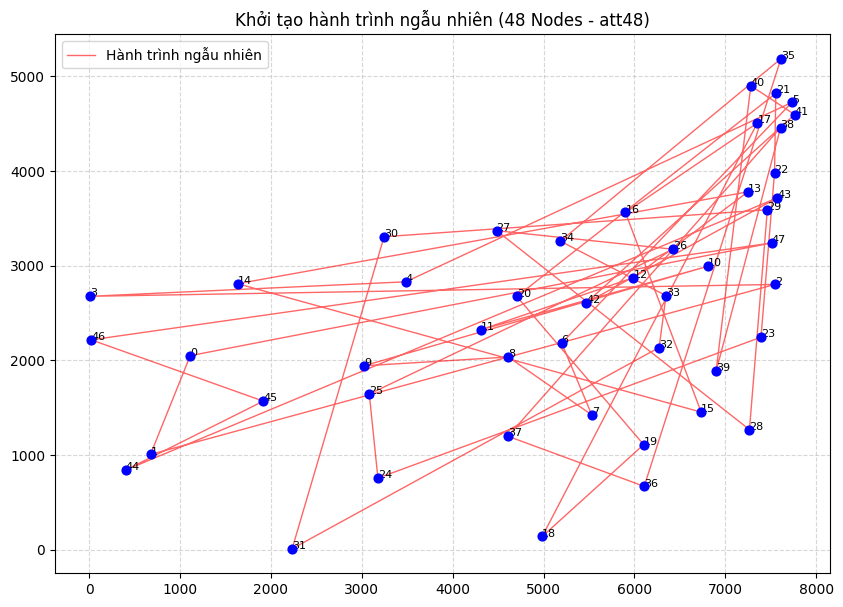

In [22]:
def plot_tour(coords, tour_indices):
    plt.figure(figsize=(10, 7))
    
    # Lấy tọa độ X và Y theo thứ tự của hành trình ngẫu nhiên
    ordered_coords = coords[tour_indices]
    
    # Vẽ các đường nối giữa các thành phố
    plt.plot(ordered_coords[:, 0], ordered_coords[:, 1], 'r-', alpha=0.6, linewidth=1, label='Hành trình ngẫu nhiên')
    
    # Vẽ các điểm thành phố
    plt.scatter(coords[:, 0], coords[:, 1], color='blue', s=40, zorder=5)
    
    # Đánh số thứ tự bốc thăm lên biểu đồ (tùy chọn)
    for i, idx in enumerate(tour_indices[:-1]):
        plt.annotate(f"{i}", (coords[idx, 0], coords[idx, 1]), fontsize=8)

    plt.title("Khởi tạo hành trình ngẫu nhiên (48 Nodes - att48)")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend()
    plt.show()

plot_tour(data, random_tour)

In [23]:

def create_population(size, nodes_count, coords_data):
    population = []
    for _ in range(size):
        tour=np.arange(nodes_count) # Tạo danh sách các chỉ số từ 0 đến nodes_count-1
        np.random.shuffle(tour) # Xáo trộn danh sách các chỉ số từ 0 đến nodes_count-1, tránh việc thuật toán bị hội tụ cục bộ quá sớm
        full_path = np.append(tour, tour[0]) # Thêm điểm đầu tiên vào cuối để hoàn thành hành trình( vòng tròn)
        dist = total_tour_distance(coords_data, full_path) 
        population.append({
            "path": full_path,
            "distance": dist
        })# Thêm cá thể vào quần thể
    return population

population_size = 100
num_nodes = data.shape[0]# Số lượng node trong dữ liệu(48)
my_population = create_population(population_size, num_nodes, data)
# In kết quả quãng đường của 100 phương án(test)
print(f"--- Quãng đường của {population_size} phương án khởi tạo ---")
for i, ind in enumerate(my_population):
    print(f"Phương án {i+1}: {ind['distance']:.2f}")

--- Quãng đường của 100 phương án khởi tạo ---
Phương án 1: 169511.62
Phương án 2: 131687.06
Phương án 3: 148338.09
Phương án 4: 171652.56
Phương án 5: 166805.96
Phương án 6: 161861.08
Phương án 7: 156306.06
Phương án 8: 152568.33
Phương án 9: 168293.23
Phương án 10: 154613.56
Phương án 11: 135590.09
Phương án 12: 153013.26
Phương án 13: 179302.41
Phương án 14: 155144.29
Phương án 15: 144729.49
Phương án 16: 165437.60
Phương án 17: 150819.84
Phương án 18: 164411.13
Phương án 19: 177613.04
Phương án 20: 147371.12
Phương án 21: 161041.77
Phương án 22: 164585.35
Phương án 23: 148008.25
Phương án 24: 153377.58
Phương án 25: 139634.49
Phương án 26: 160715.33
Phương án 27: 167972.91
Phương án 28: 167202.31
Phương án 29: 150005.89
Phương án 30: 156661.30
Phương án 31: 165154.86
Phương án 32: 169580.88
Phương án 33: 174068.59
Phương án 34: 154807.41
Phương án 35: 169428.91
Phương án 36: 156094.61
Phương án 37: 181276.07
Phương án 38: 153493.29
Phương án 39: 172057.07
Phương án 40: 149623.74
Ph

                                Evaluation      

In [24]:
def sort_population_and_select_best_half(my_population):
    sorted_population = sorted(my_population, key=lambda x: x['distance']) # tăng dần theo quãng đường(distance)
# 2. cắt 50%
    cut = len(sorted_population) // 2
# 3. Lấy 50% tốt nhất (0->nửa danh sách đã sắp xếp)
    best_50_percent = sorted_population[:cut]
    return sorted_population, best_50_percent
sorted_population, best_50_percent = sort_population_and_select_best_half(my_population)
print(f"Số lượng cá thể giữ lại: {len(best_50_percent)}")
print(f"Phương án tốt nhất có quãng đường: {sorted_population[0]['distance']:.2f}")
print("\nDanh sách quãng đường 50% tốt nhất:")
for ind in best_50_percent:
    print(f"{ind['path']}- {ind['distance']:.2f}")


Số lượng cá thể giữ lại: 50
Phương án tốt nhất có quãng đường: 129871.46

Danh sách quãng đường 50% tốt nhất:
[21 13 14 41  3  4 43 25 23 37 30 15 42  5 18 10 19 32  2 27 28  1 44 40
 11  7 39 22  0 34  9 24 47 12 35 20 38 46 16  8 45 26 31 36  6 33 29 17
 21]- 129871.46
[43 45 32 15 39 30 31 33 24 13 17  0 27 34  2  9 40  3 23 18 29  7 20 46
  6  5 38 44 41 21  1 47 26 37 16 42 36  8 28 10 35 11  4 25 22 14 12 19
 43]- 131687.06
[43 20 17 34 23  8 22 18 24 26 32 12 42 30  6 39 35  5 14 45 13 21 16 27
  2 11  7  4  0 37 36 38 47 15 28  1  9 40 19 31 46  3 41 10 25 44 33 29
 43]- 135590.09
[28  1 21 32  7 34 22 20 23 41 38 14 15  0 24 31 47  4 40 35  9 37 44 27
 29 11 10 42 12 43  8 17 26 18 36 19 39 33  5  6 45 16 25 13 46  3 30  2
 28]- 138009.42
[14 10 38 23 28 34 47  0 17  9 42  2  3 25 40 27  7  6 36 26 11 31 39 24
 46 43 45  1 20 21 13 37 44 12 32 19 22  5 15 30 18  8 33 35 16 29  4 41
 14]- 139634.49
[ 7 32 15 20 40 22  2 36  5 42 10 44 29 14 41 28 24 17 31  9 23 11 18 46
 27  4 

                                Crossover & Mutation &Selection 
                                

In [25]:
def cycle_crossover(parent1_path, parent2_path):
    # Lấy n phần tử đầu (bỏ điểm quay về cuối cùng)
    p1=parent1_path[:-1]
    p2=parent2_path[:-1]
    n = len(p1)
    # Khởi tạo 2 con với giá trị rỗng (-1)
    child1 = np.full(n, -1, dtype=int)
    child2 = np.full(n, -1, dtype=int)
    # đánh dấu các phần tử đã thăm
    visited = np.zeros(n, dtype=bool)
    cycle_id = 0
    """
    i->current=0
    cycle_indices = []
    cycle_indices.append(0)
    visited[0]=True
    current_value_in_p2 = p2[0]=9
    current=np.where(p1 == current_value_in_p2)[0][0]=8
    
    Cha 1 (P1): [1, 2, 3, 4, 5, 6, 7, 8, 9] 
    Cha 2 (P2): [9, 3, 7, 8, 2, 6, 5, 1, 4]
    [0, 8, 3, 7] tạo thành chu trình 1( cycle_id = 0)(1-9-8-4-1)
    child1 lấy từ P1, child2 lấy từ P2
    c1=[1, -1, -1, 4, -1, -1, -1, 8, 9]
    c2=[9, -1, -1, 8, -1, -1, -1, 1, 4]
    [1, 2, 6, 4] tạo thành chu trình 2( cycle_id = 1)(2-3-7-5-2)
    c1 lấy từ P2, c2 lấy từ P1
    c1=[1, 3, 7, 4, 2, -1, 5, 8, 9]
    c2=[9, 2, 3, 8, 5, -1, 7, 1, 4]
    """
    for i in range(n):
        if not visited[i]:
            # Tìm một chu trình mới
            cycle_indices = []
            current = i
            while current not in cycle_indices:
                cycle_indices.append(current)
                visited[current]=True
                # Tìm chỉ số của phần tử tương ứng trong cha kia
                current_value_in_p2 = p2[current]
                current=np.where(p1 == current_value_in_p2)[0][0]
            # Sao chép xen kẽ các chu trình vào con( child1 và child2 lấy từ p1 và p2, cycle_id chẵn thì lấy từ p1, lẻ thì lấy từ p2 và ngược lại)
            if cycle_id % 2 == 0:
                child1[cycle_indices] = p1[cycle_indices]
                child2[cycle_indices] = p2[cycle_indices]
            else:
                child1[cycle_indices] = p2[cycle_indices]
                child2[cycle_indices] = p1[cycle_indices]
            cycle_id += 1
            
    # Khép kín vòng lặp cho các con
    full_c1 = np.append(child1, child1[0])
    full_c2 = np.append(child2, child2[0])
    return full_c1, full_c2

In [26]:
def swap_mutation(path_indices, p_m=0.1):
    """Đột biến đổi chỗ 2 điểm """
    path = path_indices[:-1].copy() # Lấy n node (bỏ điểm quay về)
    
    if random.random() < p_m:
        # Chọn 2 vị trí bất kỳ và đổi chỗ
       
        idx1, idx2 = random.sample(range(len(path)), 2)
        path[idx1], path[idx2] = path[idx2], path[idx1]
        
    return np.append(path, path[0]) # Khép kín vòng lặp

In [27]:
def selection_elitism(combined_population, n_size):
    """Chọn lọc Elitism: Giữ lại n cá thể tốt nhất """
    # Sắp xếp theo quãng đường tăng dần
    sorted_pop = sorted(combined_population, key=lambda x: x['distance'])
    # Trả về n_size cá thể đứng đầu(slicing)
    return sorted_pop[:n_size]

In [28]:
def breed_population(parent_pop, coords_data, p_c=0.7):
    offspring_pop = []
    # Xáo trộn danh sách cha mẹ để chọn cặp ngẫu nhiên
    random.shuffle(parent_pop)
    # Chia cặp (ví dụ: cá thể 0 lai với 1, 2 lai với 3...)
    # chia ra do ton bo nho
    for i in range(0, len(parent_pop) - 1, 2):
        parent1 = parent_pop[i]
        parent2 = parent_pop[i+1]
        if random.random() < p_c:
            # Thực hiện lai ghép nếu xác suất nhỏ hơn p_c
            c1_path, c2_path = cycle_crossover(parent1['path'], parent2['path'])
            # Tính quãng đường và thêm vào danh sách con
            offspring_pop.append({"path": c1_path, "distance": total_tour_distance(coords_data, c1_path)})
            offspring_pop.append({"path": c2_path, "distance": total_tour_distance(coords_data, c2_path)})
        else:
            # Nếu không lai, giữ nguyên cha mẹ làm con (hoặc tạo bản sao)
            offspring_pop.append(parent1.copy())
            offspring_pop.append(parent2.copy())
    return offspring_pop


In [ ]:
N = 500          # Kích thước quần thể
generations = 500  # Số thế hệ
p_c = 0.9      # Xác suất lai ghép
p_m = 0.1   # Xác suất đột biến

#  Khởi tạo quần thể ban đầu (P0) 
current_pop = sort_population_and_select_best_half(create_population(N*5, num_nodes, data))[1] # best_50_percent lấy quần thể tốt nhất
history_best = []
history_best_path=[]
print("Bắt đầu tiến hóa...")

for gen in range(generations):
    # Lai ghép tạo quần thể con (Ct) 
    offspring = breed_population(current_pop, data, p_c)
     
    #  Đột biến các cá thể con 
    for ind in offspring:
        ind['path'] = swap_mutation(ind['path'], p_m)
        ind['distance'] = total_tour_distance(data, ind['path'])
        
    # Chọn lọc sinh tồn (Pt+1) 
    # Gộp cha mẹ và con lại rồi chọn N cái tốt nhất
    combined = current_pop + offspring
    current_pop = selection_elitism(combined, N)
    
    # Lưu lại kết quả tốt nhất thế hệ này để theo dõi
    best_dist = current_pop[0]['distance']# Quãng đường tốt nhất hiện tại(float)
    history_best.append(best_dist)
    best_path = current_pop[0]['path'] # Lộ trình tốt nhất hiện tại(array)
    history_best_path.append(best_path)
    if (gen + 1) % 10 == 0:
        print(f"Thế hệ {gen+1}: Quãng đường ngắn nhất = {best_dist:.2f}")

print(f"Quãng đường đã giảm từ {history_best[0]:.2f} xuống còn {history_best[-1]:.2f}")

Bắt đầu tiến hóa...
Thế hệ 10: Quãng đường ngắn nhất = 106676.47
Thế hệ 20: Quãng đường ngắn nhất = 92958.23


In [30]:
print({history_best[-1]})
print(history_best_path[-1])

{57317.68109132519}
[10 22 13 41 25  3  1 28  4 47 24 12 38 31 20 11 14 37  8 39  2 21  0  7
 30  6 36 18 17 43 15 40 33 45 26 16 42 23 44 34  9 46 19 29  5 27 35 32
 10]


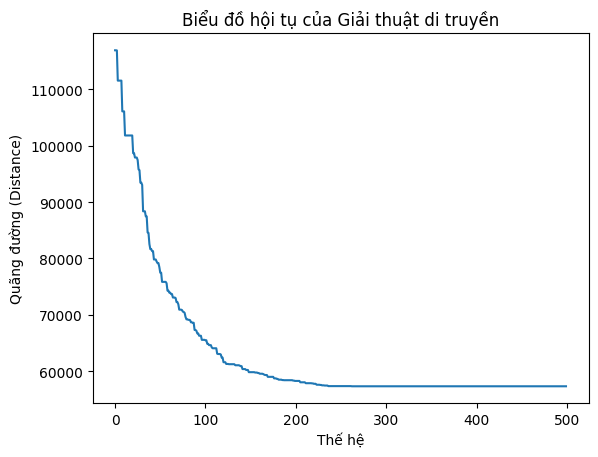

In [31]:
import matplotlib.pyplot as plt

plt.plot(history_best)
plt.title("Biểu đồ hội tụ của Giải thuật di truyền")
plt.xlabel("Thế hệ")
plt.ylabel("Quãng đường (Distance)")
plt.show()